In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.day

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [5]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

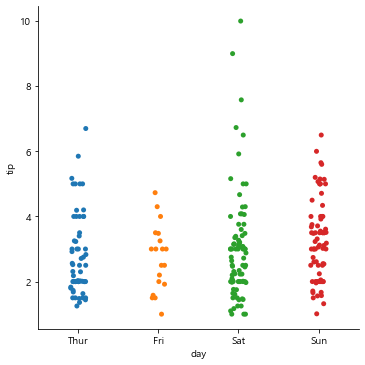

In [6]:
# 요일별 tip 데이터 시각화
sns.catplot(x='day', y='tip', data=tips);

C:\Users\Playdata\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


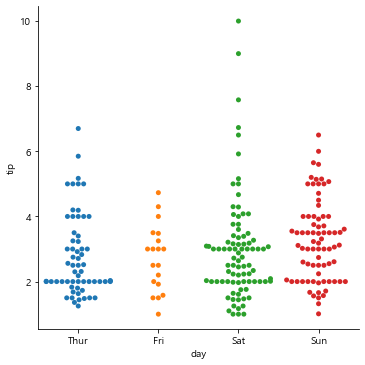

In [7]:
# 중첩되지 않는 표현. 데이터 양이 많을 때는 부적합
sns.catplot(x='day', y='tip', data=tips, kind='swarm');

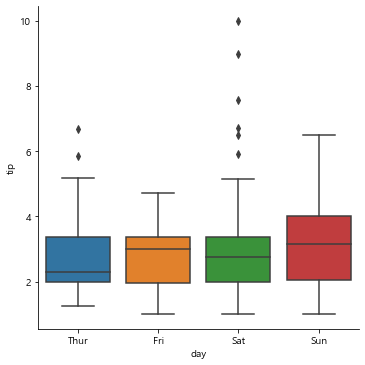

In [8]:
sns.catplot(x='day', y='tip', data=tips, kind='box');

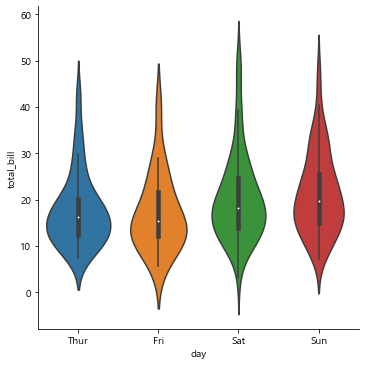

In [11]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin');

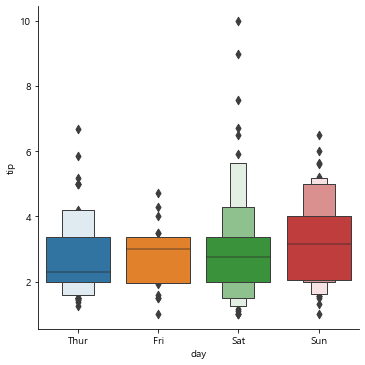

In [12]:
sns.catplot(x='day', y='tip', data=tips, kind='boxen');

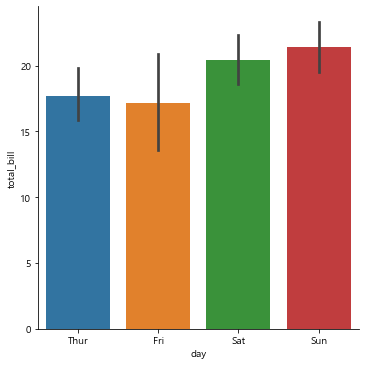

In [13]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar');

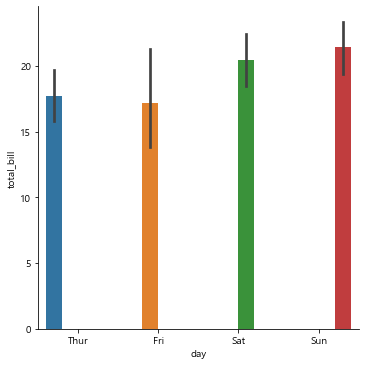

In [14]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar', hue='day');

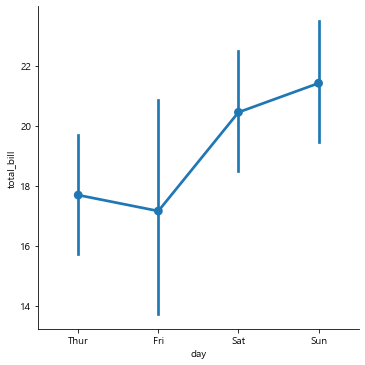

In [15]:
# point를 적용하는 범주형 데이터 차트

sns.catplot(x='day', y='total_bill', data=tips, kind='point');

seaborn의 특징 - 추상화가 잘 되어 있음 = 데이터 분석 중요

https://seaborn.pydata.org/tutorial/function_overview.html

In [18]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


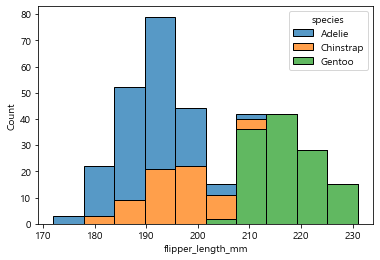

In [19]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

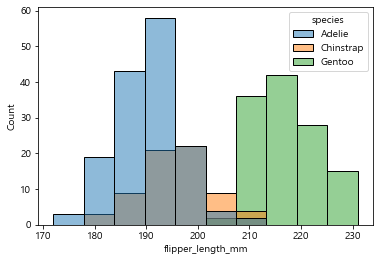

In [20]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species");

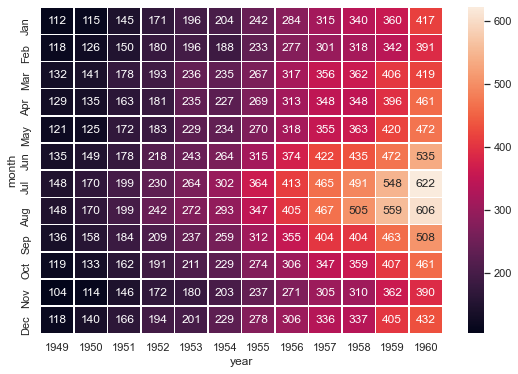

In [22]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
# 중요: 섬세한 작업은 sns가 직접적으로 적용불가한 부분이 있음. 해결책은 matplotlib
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax);

In [23]:
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [24]:
flights_long['year'].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

In [25]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


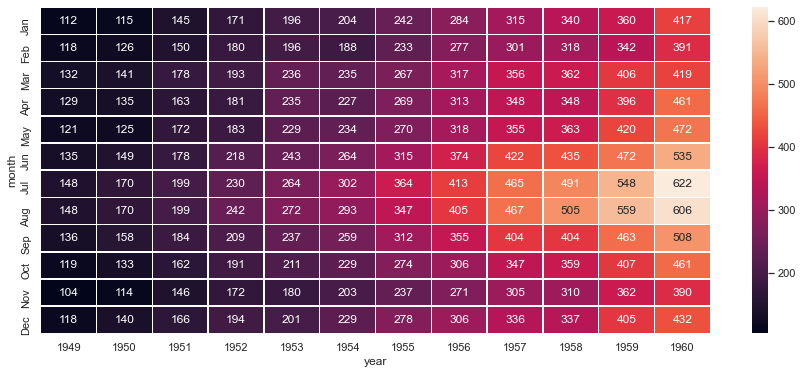

In [26]:
# annot=True: 각 데이터 표현 여부. 생략 시 수치값 안 보임
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax);

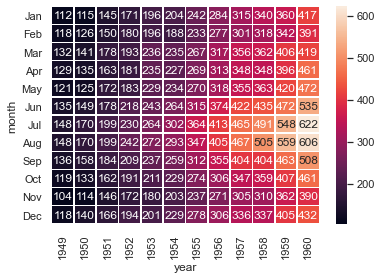

In [28]:
#  f, ax 생략 시에는 최소 사이즈로 히트맵이 그려짐. 즉 사이즈 조절 등은 matplotlib 필요
# f, ax = plt.subplots(figsize=(9, 6))

# linewidths=.5 라인 여백 표현
# fmt="d": 수치를 정수 표기로 출력하라는 포맷 설정
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5);

https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=fmt